# results

In [1]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF/Logistic_emotion'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_pred.npy", allow_pickle=True).squeeze()
app_k = np.array(np.load("appro_ks.npy", allow_pickle=True).squeeze())
old_prediction = np.load("old_predictions.npy", allow_pickle=True).squeeze()
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
#pred = np.load("pred.npy", allow_pickle=True)
app_k.shape

(1003,)

In [3]:
np.nanmean(app_k)

500.2194323144105

In [4]:
pred = old_prediction

In [5]:
nan = new_pred_k[0]

In [6]:
nan = new_pred_k_nonon[0]
nan

NameError: name 'new_pred_k_nonon' is not defined

In [7]:
new_pred_k_nonon = [new_pred_k[i] for i in range(app_k.shape[0]) if new_pred_k[i] > 0]
len(new_pred_k_nonon)

916

# can find smallest k

In [8]:
app_k_nonon = [app_k[i] for i in range(app_k.shape[0]) if app_k[i] > 0]
len(new_pred_k_nonon)

916

In [9]:
np.mean(app_k_nonon)

500.2194323144105

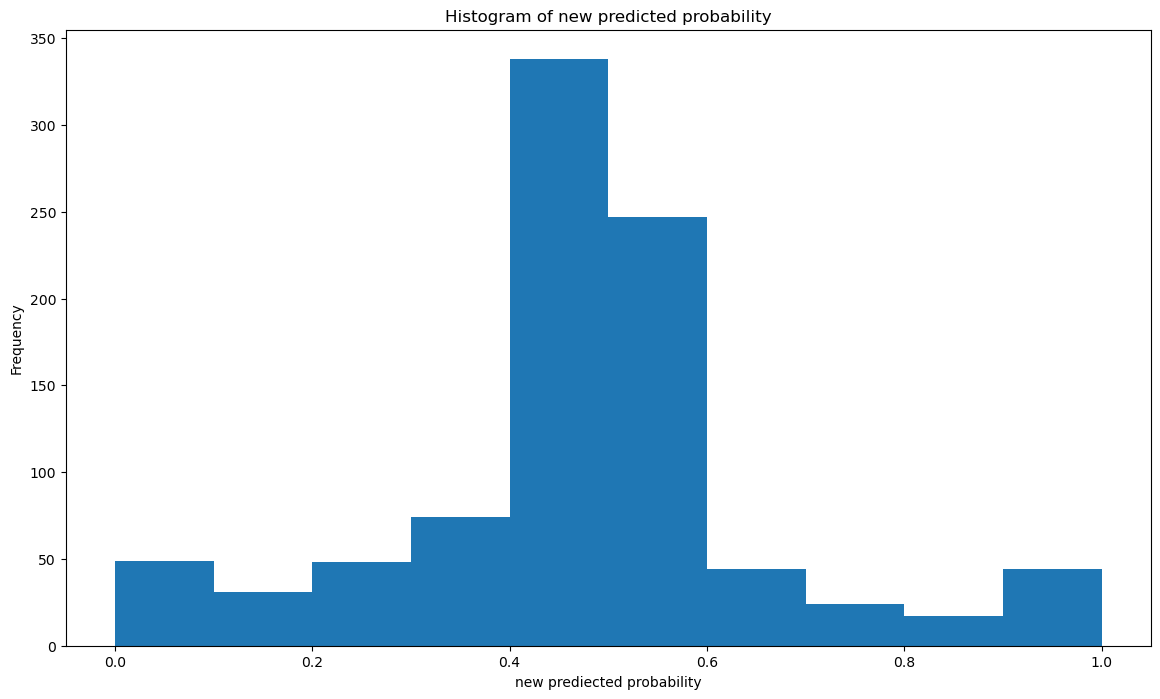

In [10]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(new_pred_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

In [11]:
app_k_nonon = [app_k[i] for i in range(1298) if app_k[i] > 0]
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

IndexError: index 1003 is out of bounds for axis 0 with size 1003

In [12]:
flips = np.zeros((app_k.shape[0], 1))
diff = np.zeros((app_k.shape[0], 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(app_k.shape[0]):
    print("i", i)
    if app_k[i] > 0:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

i 0
old 0.4281949532814383
new 0.5095189788687448
appro k 43.0
flip label [1.]

i 1
old 0.6384329207338122
new 0.4693092254228107
appro k 139.0
flip label [1.]

i 2
old 0.13458845457794735
new 0.9740908584549031
appro k 3006.0
flip label [1.]

i 3
old 0.24096942965599463
new 0.6496141027551404
appro k 287.0
flip label [1.]

i 4
old 0.685511794021277
new 0.43418055025453567
appro k 168.0
flip label [1.]

i 5
old 0.4189420895753839
new 0.5090667345938892
appro k 103.0
flip label [1.]

i 6
old 0.11920936189888848
new 0.9748656263092086
appro k 1851.0
flip label [1.]

i 7
old 0.5274833241481262
new 0.4979516586887249
appro k 15.0
flip label [1.]

i 8
old 0.4063526852976777
new 0.5143589807912227
appro k 62.0
flip label [1.]

i 9
i 10
old 0.4323036225610559
new 0.504834984949998
appro k 39.0
flip label [1.]

i 11
old 0.6263903784720725
new 0.4724585627601591
appro k 182.0
flip label [1.]

i 12
old 0.8442239103260918
new 0.09853309142220808
appro k 1733.0
flip label [1.]

i 13
old 0.11816691

In [13]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(app_k.shape[0])])
num_flip

916

In [107]:
app_k.shape

(1298,)

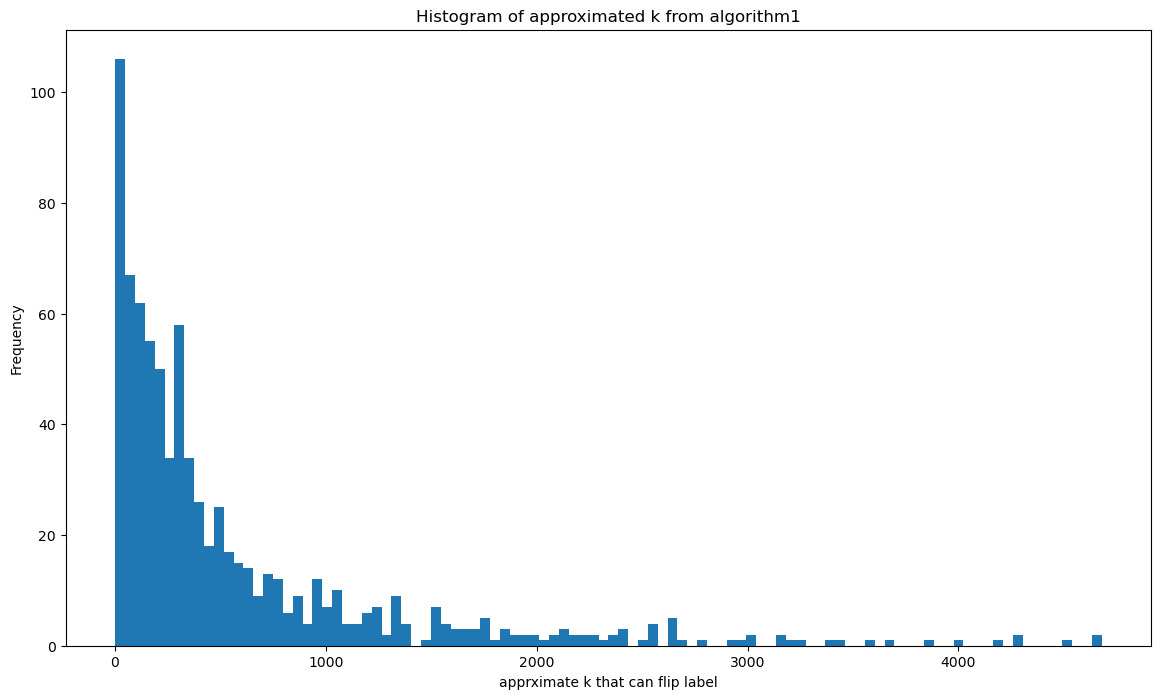

In [12]:

flip_idx = np.array([i for i in range(app_k.shape[0]) if flips[i] == 1 ])
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

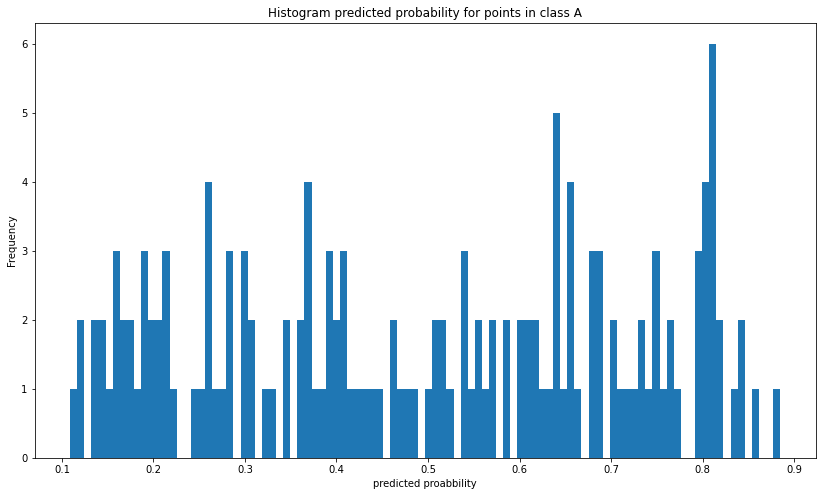

In [112]:
old_prediction
K_flip = old_prediction[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("predicted proabbility")
plt.ylabel("Frequency")
plt.title("Histogram predicted probability for points in class A")
plt.show()

In [13]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(app_k.shape[0])])
num_noflip

131

In [14]:
# diff for those flip the lable
diff1=[diff[i] for i in range(app_k.shape[0]) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.28396391615226313, 0.026915085942879075)